# <p style="background-color:chocolate;font-family:newtimeroman;font-size:180%;color:white;text-align:center;border-radius:10px 10px;"><b> Time series Modeling

Time series modeling involves analyzing data points collected or recorded at specific time intervals to identify patterns, trends, and relationships over time. It is widely used in various fields, including finance, economics, environmental science, and engineering. Here’s a concise overview of the key issues and features associated with time series modeling:

Key Issues in Time Series Modeling
Seasonality:

Many time series exhibit seasonal patterns, where data points show regular fluctuations at specific intervals (e.g., monthly sales spikes during holidays). Identifying and modeling these seasonal effects is crucial.
Trend:

Trends refer to long-term movements in the data. Recognizing whether a time series is increasing, decreasing, or stable over time is essential for accurate forecasting.
Stationarity:

A stationary time series has constant mean and variance over time. Many statistical methods require stationarity, so it may be necessary to transform non-stationary data (e.g., through differencing or detrending).
Autocorrelation:

Time series data often exhibit autocorrelation, where current values are correlated with past values. Understanding these correlations helps in selecting appropriate models.
Noise:

Time series data can be noisy and may contain random fluctuations that obscure underlying patterns. Distinguishing between noise and genuine signals is a common challenge.
Outliers:

Outliers can significantly impact the results of time series analysis. Identifying and handling outliers is important for building robust models.
Data Frequency:

Time series can be recorded at various frequencies (e.g., hourly, daily, monthly). The choice of frequency affects the modeling approach and the insights derived.
Lag Effects:

Changes in one variable may affect another variable after some time. Understanding lag effects is essential for accurate modeling and forecasting.
Features of Time Series Data
Temporal Ordering:

The data points are ordered in time, meaning the sequence of observations matters. This ordering is crucial for analysis and forecasting.
Time Index:

Each observation is associated with a specific timestamp, allowing for the identification of trends, seasonality, and other temporal patterns.
Correlation with Time:

Time series data often exhibit correlation with past values (lagged values), which can be exploited in modeling.
Non-Independence:

Unlike independent observations in many statistical analyses, time series data points are typically dependent on one another.
Dynamic Nature:

Time series data can evolve over time, meaning models may need to adapt to changes in patterns or relationships.
Multiple Seasonalities:

Some time series may exhibit multiple seasonal cycles, such as daily, weekly, and yearly patterns, which need to be captured in the modeling process.
Common Time Series Models
ARIMA (AutoRegressive Integrated Moving Average): A widely used statistical model that combines autoregression, differencing, and moving averages.
Exponential Smoothing: Techniques that weigh past observations with exponentially decreasing weights to forecast future values.
Seasonal Decomposition of Time Series (STL): A method to decompose a time series into seasonal, trend, and residual components.
Prophet: A forecasting tool developed by Facebook that is effective for time serie
RNN, LSTM, GRUs with strong seasonal effects and missing data.
Conclusion
Time series modeling is a powerful tool for understanding and forecasting data that changes over time. By addressing the key issues and leveraging the unique features of time series data, analysts can develop models that provide valuable insights and predictions

# <p style="background-color:chocolate;font-family:newtimeroman;font-size:180%;color:white;text-align:center;border-radius:10px 10px;"><b> Multivariate Time Series Analysis & Forecasting with GRU
## Content:

- About Dataset
- Importing Libraries
- Read Data
- Visualisations/EDA
- Modeling
    - RNN
    - LSTM
    - GRU
<br>
- review GRU
- Conclusion

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 1) About Dataset</p></div>

The Dataset is fully dedicated for the developers who want to train the model on Weather Forecasting for Indian climate. This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. 

The 4 parameters here are:

- meantemp
- humidity
- wind_speed
- meanpressure

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 2) Import Libraries</p></div> 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 3) Read Data</p></div> 

In [75]:
# read train data

df = pd.read_csv("DailyDelhiClimateTest.csv", 
                 parse_dates=['date'],  # change to date time format
                 index_col="date")
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913,85.870,2.743,59.000
2017-01-02,18.500,77.222,2.894,1018.278
2017-01-03,17.111,81.889,4.017,1018.333
2017-01-04,18.700,70.050,4.545,1015.700
2017-01-05,18.389,74.944,3.300,1014.333
...,...,...,...,...
2017-04-20,34.500,27.500,5.562,998.625
2017-04-21,34.250,39.375,6.963,999.875
2017-04-22,32.900,40.900,8.890,1001.600


In [76]:
df.info()  

# no null values
# all float

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,114.000,21.713,6.360,11.000,16.437,19.875,27.705,34.500
humidity,114.000,56.258,19.068,17.750,39.625,57.750,71.903,95.833
wind_speed,114.000,8.144,3.588,1.388,5.564,8.069,10.069,19.314
meanpressure,114.000,1004.035,89.475,59.000,1007.438,1012.739,1016.740,1022.810


In [78]:
# creating new features for EDA

df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df["date"] = df.index.date

df.head()

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,date
date,,,,,,,,,
2017-01-01,15.913,85.870,2.743,59.000,2017,1,1,6,2017-01-01
2017-01-02,18.500,77.222,2.894,1018.278,2017,1,2,0,2017-01-02
2017-01-03,17.111,81.889,4.017,1018.333,2017,1,3,1,2017-01-03
2017-01-04,18.700,70.050,4.545,1015.700,2017,1,4,2,2017-01-04
2017-01-05,18.389,74.944,3.300,1014.333,2017,1,5,3,2017-01-05


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
 4   year          114 non-null    int32  
 5   month         114 non-null    int32  
 6   day           114 non-null    int32  
 7   dayofweek     114 non-null    int32  
 8   date          114 non-null    object 
dtypes: float64(4), int32(4), object(1)
memory usage: 7.1+ KB


# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 4) Exploratory Data Analysis and Visualizations</p></div> 

## Creating my own plotly template:

In [80]:
# creating dark gray template(xgridoff_dark) from xgridoff template: 

import plotly.io as pio

# Get the 'xgridoff' template
xgridoff_template = pio.templates['xgridoff']

# Customize the template for dark mode
xgridoff_template.layout.paper_bgcolor = 'rgb(25, 25, 25)'  # very dark gray background
xgridoff_template.layout.plot_bgcolor = 'rgb(35, 35, 35)'  # Dark gray plot background

xgridoff_template.layout.font.color = 'lightgray'  # Light gray font color

# Adjust gridline color and width
xgridoff_template.layout.xaxis.gridcolor = 'rgba(200, 200, 200, 0.3)'  # Light gray with transparency
xgridoff_template.layout.yaxis.gridcolor = 'rgba(200, 200, 200, 0.3)'  # Light gray with transparency
xgridoff_template.layout.xaxis.gridwidth = 1  # Set gridline width
xgridoff_template.layout.yaxis.gridwidth = 1  # Set gridline width

# Update Plotly templates with the modified 'xgridoff' template
pio.templates['xgridoff_dark'] = xgridoff_template

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>4.1 Line Plots 📈</p></div>

## Plotting features over time (daily):

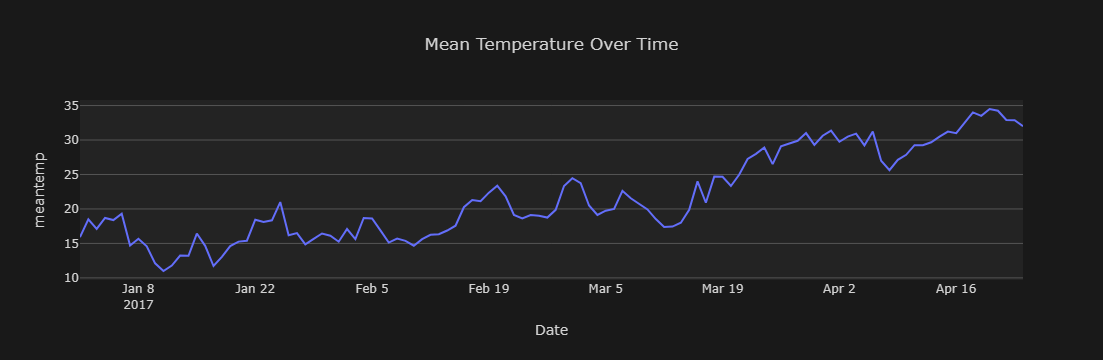

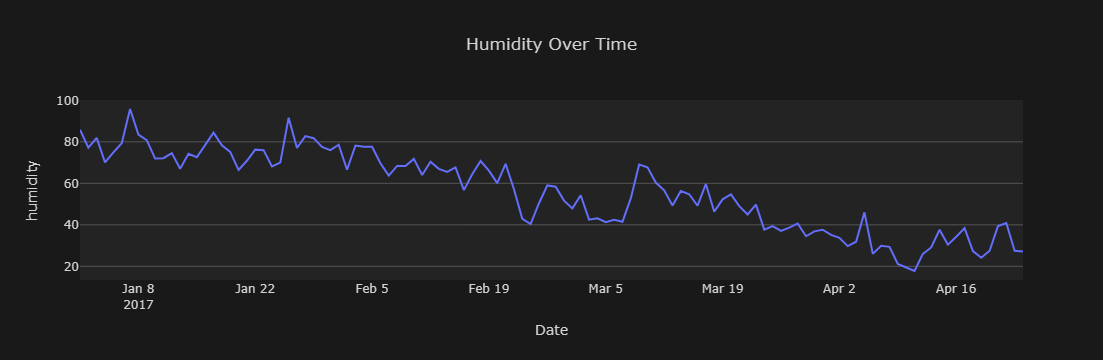

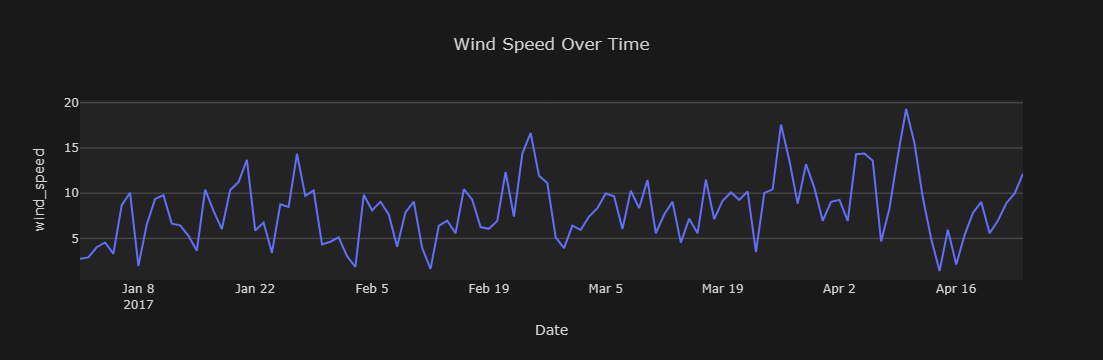

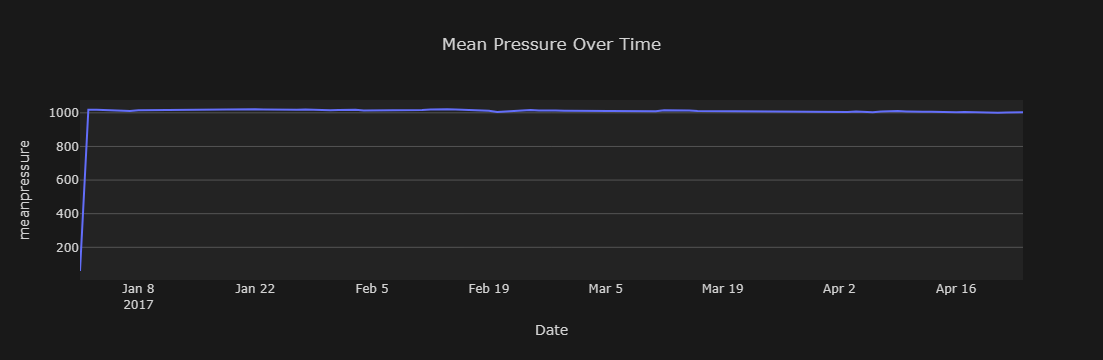

In [81]:
fig_meantemp = px.line(df, x=df.index, y='meantemp', title='Mean Temperature Over Time')
fig_meantemp.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_meantemp.show()

fig_humidity = px.line(df, x=df.index, y='humidity', title='Humidity Over Time')
fig_humidity.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_humidity.show()

fig_wind_speed = px.line(df, x=df.index, y='wind_speed', title='Wind Speed Over Time')
fig_wind_speed.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_wind_speed.show()

fig_meanpressure = px.line(df, x=df.index, y='meanpressure', title='Mean Pressure Over Time')
fig_meanpressure.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_meanpressure.show()


## Plotting Seasonal Decompositions with plotly:

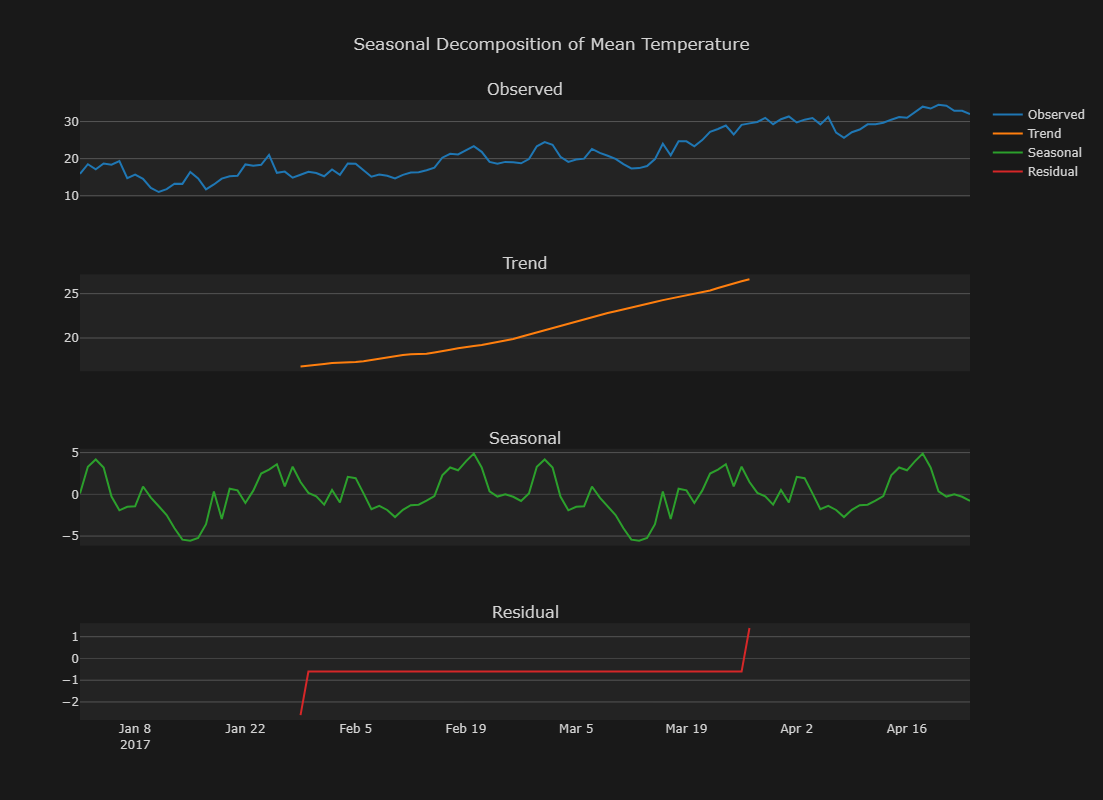

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.subplots as sp

# Perform seasonal decomposition
result = seasonal_decompose(df['meantemp'], model='additive', period=57)

# Plot the decomposed components
fig = sp.make_subplots(rows=4, cols=1, shared_xaxes=True, 
                       subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual'])

fig.add_trace(go.Scatter(x=df.index, y=result.observed, mode='lines', name='Observed'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='lines', name='Residual'), row=4, col=1)

fig.update_layout(template= 'xgridoff_dark',height=800, title='Seasonal Decomposition of Mean Temperature')
fig.show()


## Plotting Features over time (Month):

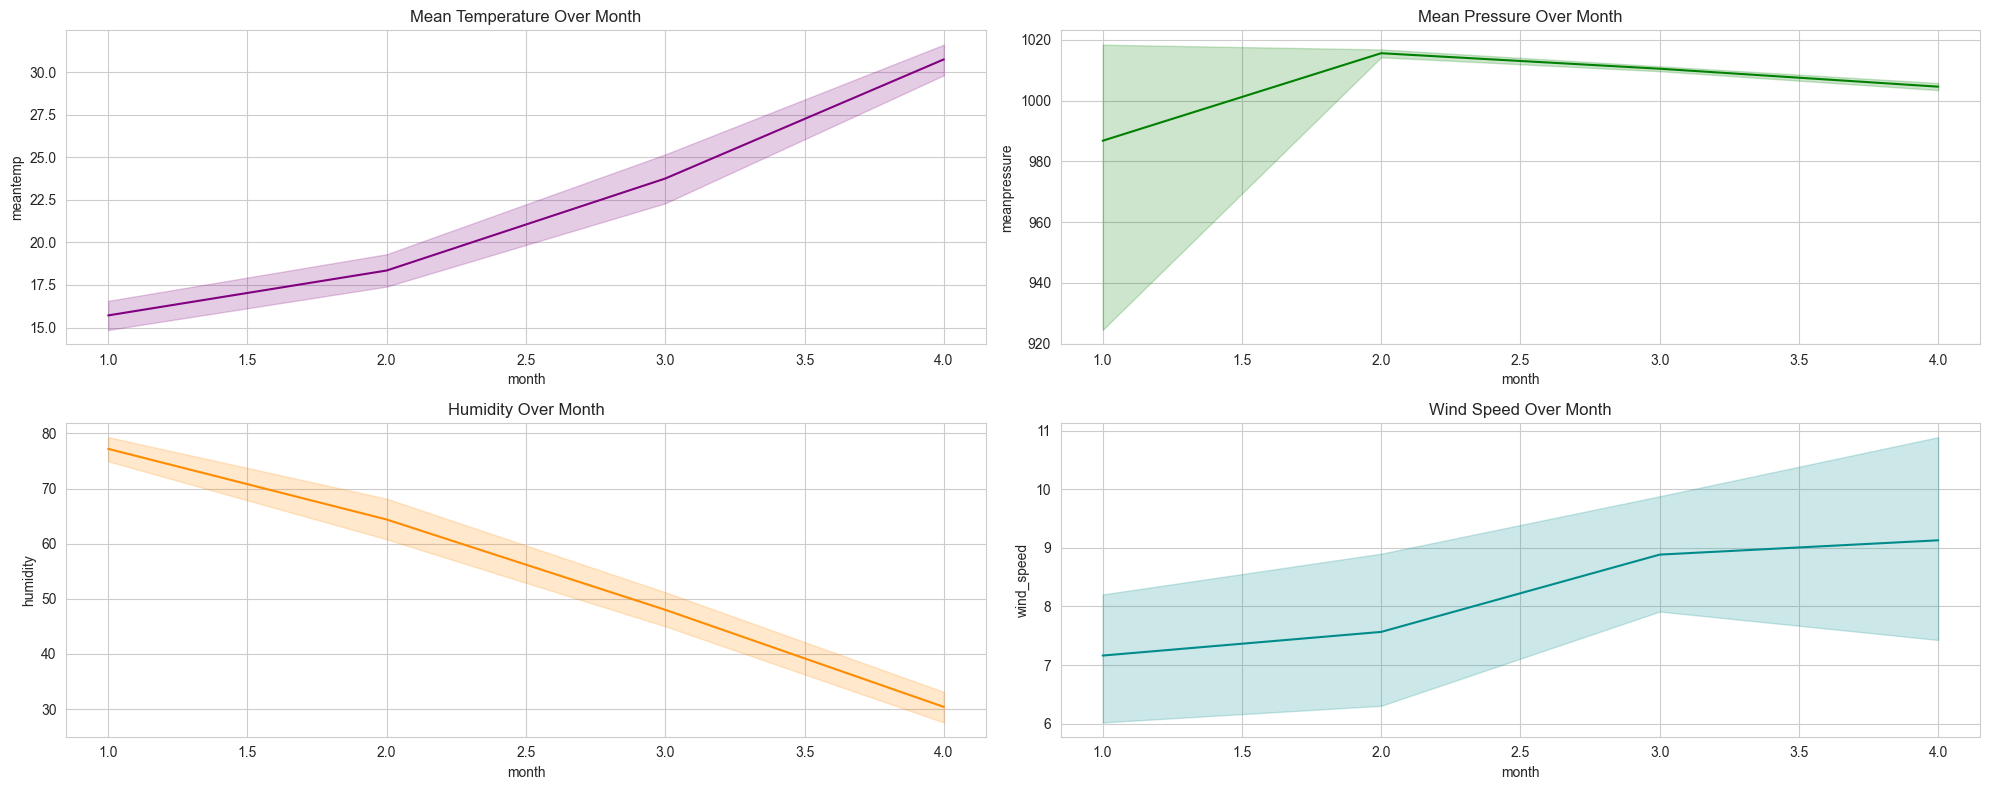

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

sns.set_style('darkgrid')

# Plot each parameter against the 'month'
sns.lineplot(x='month', y='meantemp', data=df, color='purple', ax=axes[0][0])
axes[0][0].set_title('Mean Temperature Over Month')

sns.lineplot(x='month', y='humidity', data=df, color='darkorange', ax=axes[1][0])
axes[1][0].set_title('Humidity Over Month')

sns.lineplot(x='month', y='meanpressure', data=df, color='green', ax=axes[0][1])
axes[0][1].set_title('Mean Pressure Over Month')

sns.lineplot(x='month', y='wind_speed', data=df, color='darkcyan', ax=axes[1][1])
axes[1][1].set_title('Wind Speed Over Month')

plt.tight_layout()
plt.show()


## Plotting temprature over the years by month:

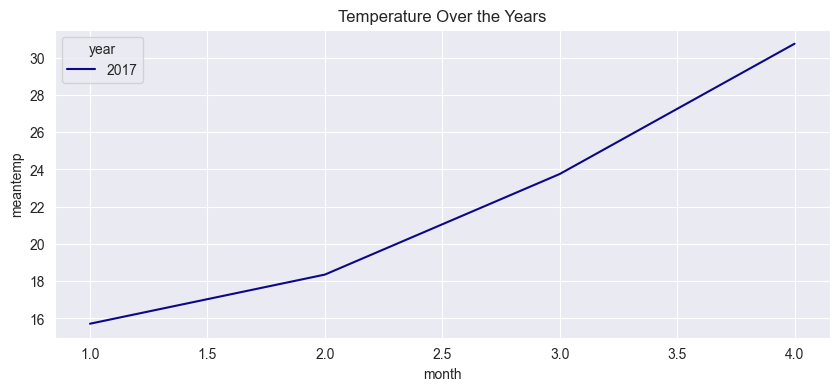

In [84]:
# Create a figure with the specified size
plt.figure(figsize=(10, 4))

sns.set_style('darkgrid')

plt.title("Temperature Over the Years")
sns.lineplot(data=df, x='month', y='meantemp', hue='year', palette='plasma', ci= None);

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>4.2 Plotting Correlation and Heatmaps</p></div>

### Plotly heatmap color choices: 
 
 'aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance', 'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg', 'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl', 'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric', 'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'

## Monthly Average (Temprature, Pressure, Humidity, Wind Speed) Heatmap with Annotations for each year:

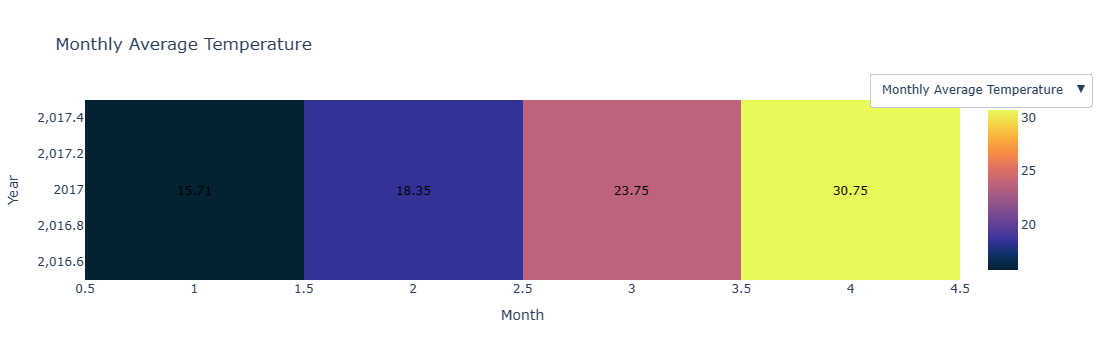

In [85]:
import plotly.graph_objects as go

# Function to create a heatmap trace for a given feature
def create_heatmap_trace(data, feature):
    heatmap_data = data.pivot_table(values=feature, index='year', columns='month', aggfunc='mean')
    heatmap_text = heatmap_data.round(2).astype(str).values

    heatmap = go.Heatmap(
        z=heatmap_data.values,
        x=heatmap_data.columns,
        y=heatmap_data.index,
        colorscale='thermal',
        text=heatmap_text,
        hoverinfo='text'
    )

    annotations = []
    for i in range(len(heatmap_data.index)):
        for j in range(len(heatmap_data.columns)):
            annotations.append(
                go.layout.Annotation(
                    x=heatmap_data.columns[j],
                    y=heatmap_data.index[i],
                    text=heatmap_text[i][j],
                    showarrow=False,
                    font=dict(color='white' if heatmap_data.values[i, j] < (heatmap_data.values.max() / 2) else 'black')
                )
            )

    return heatmap, annotations

# Create heatmap traces and annotations for each feature
features = ['meantemp', 'meanpressure', 'humidity', 'wind_speed']
titles = ['Monthly Average Temperature', 'Monthly Average Pressure', 'Monthly Average Humidity', 'Monthly Average Wind Speed']

heatmap_traces = []
annotations_list = []

for feature in features:
    heatmap, annotations = create_heatmap_trace(df, feature)
    heatmap_traces.append(heatmap)
    annotations_list.append(annotations)

# Initialize figure with all traces but only show the first one
fig = go.Figure(data=heatmap_traces)

# Set initial visibility
for i, trace in enumerate(fig.data):
    trace.visible = (i == 0)

fig.update_layout(
    title=titles[0],
    xaxis=dict(nticks=12, title='Month'),
    yaxis=dict(title='Year'),
    annotations=annotations_list[0]
)

# Create dropdown buttons for switching between heatmaps
dropdown_buttons = [
    dict(
        args=[{'visible': [j == i for j in range(len(features))]},
              {'annotations': annotations_list[i],
               'title': titles[i]}],
        label=title,
        method='update'
    )
    for i, title in enumerate(titles)
]

# Add dropdown menu to layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=dropdown_buttons,
            direction='down',
            showactive=True,
            x=1.15,  # Positioning the button to the right
            y=1.15  # Positioning the button at the top
        )
    ],
    xaxis=dict(title='Month'),
    yaxis=dict(title='Year')
)

fig.show()

## Heatmap with seaborn:

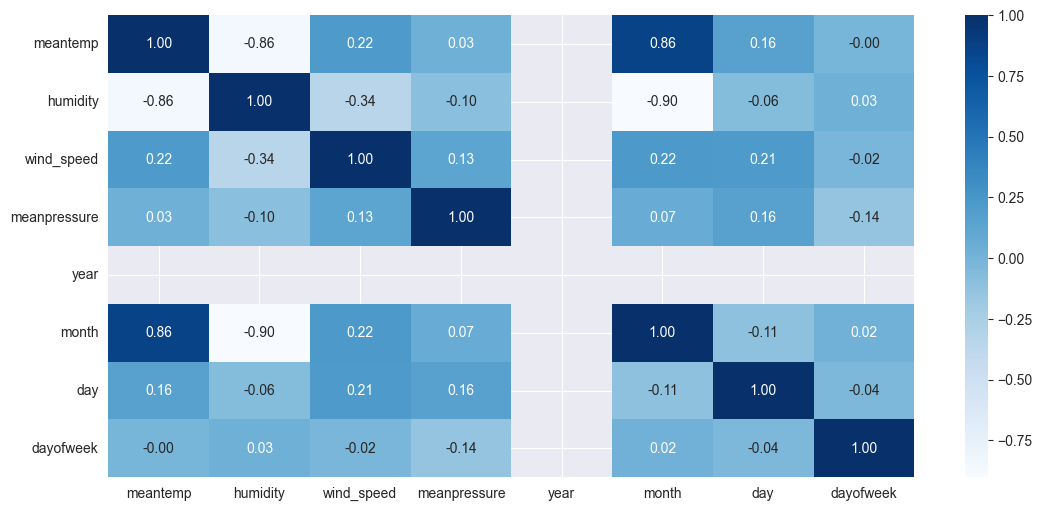

In [86]:
plt.figure(figsize=(13, 6))

sns.heatmap(df.select_dtypes('number').corr(), cmap='Blues', annot=True, fmt='.2f');

## Correlation Barplot with meantemp feature:

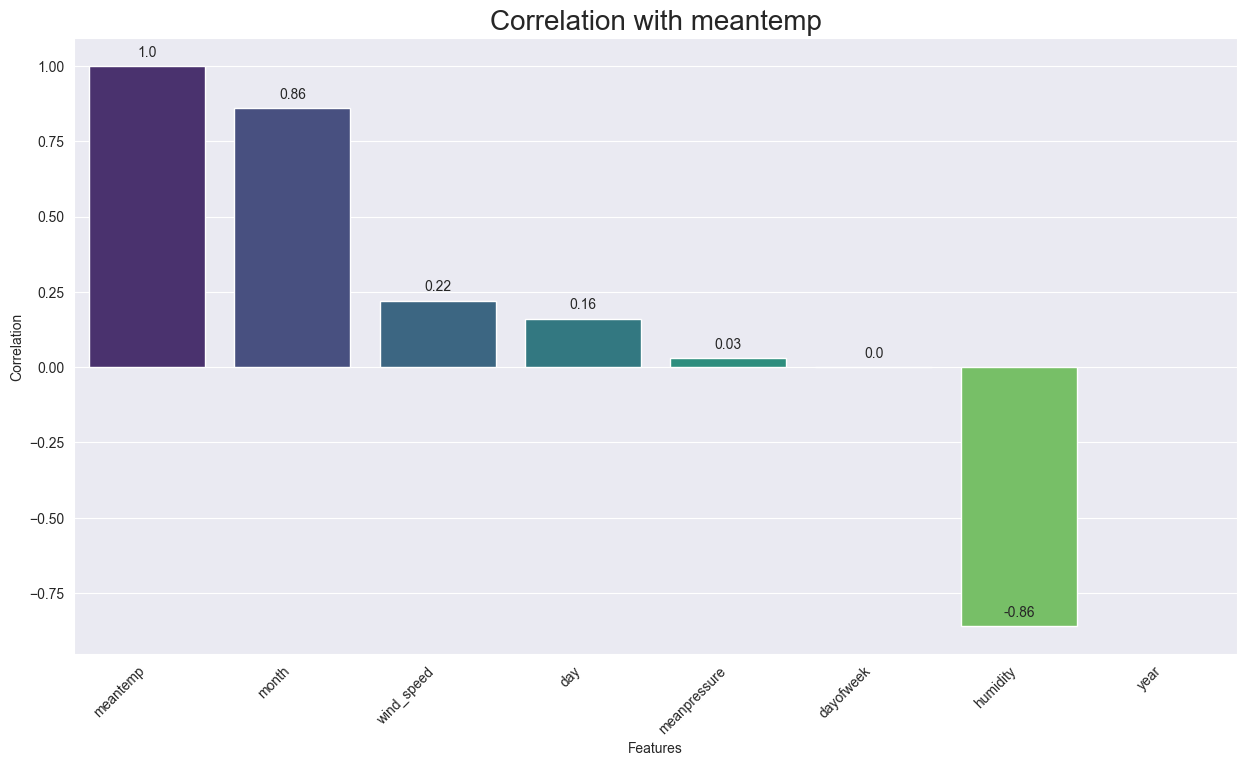

In [87]:
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')

correlation_matrix = round(df.select_dtypes('number').corr(), 2)

correlation_with_trgt = correlation_matrix['meantemp'].sort_values(ascending=False)

ax = sns.barplot(x=correlation_with_trgt.index, y=correlation_with_trgt, palette='viridis')

plt.title('Correlation with meantemp', size= 20)
plt.xlabel('Features')
plt.ylabel('Correlation')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.show()

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>4.3 Box Plots</p></div>

## Monthly Distributions of features:

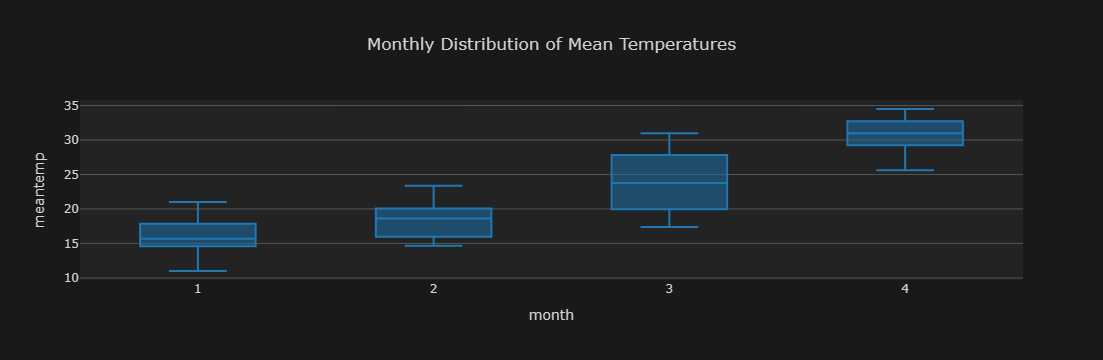

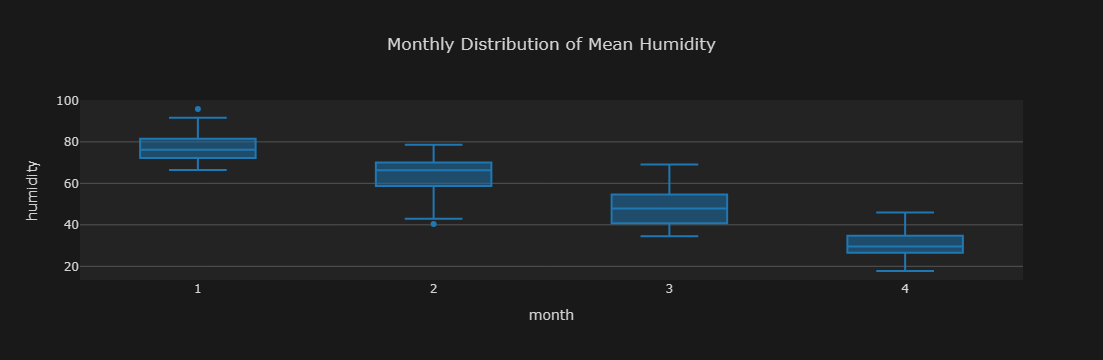

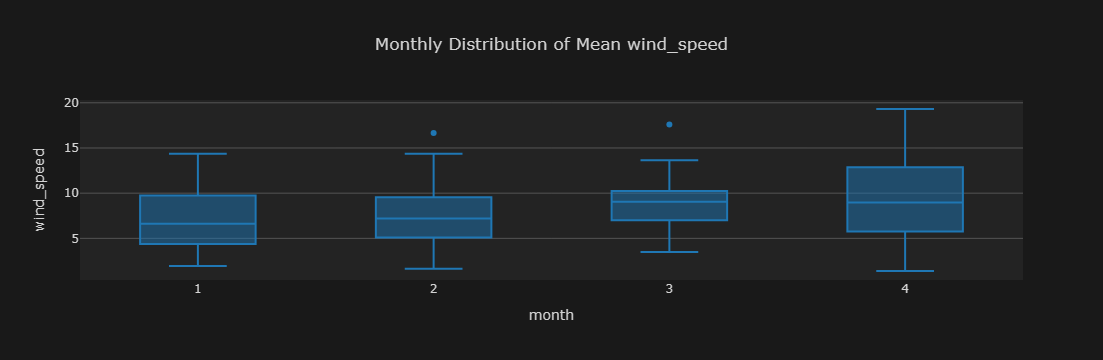

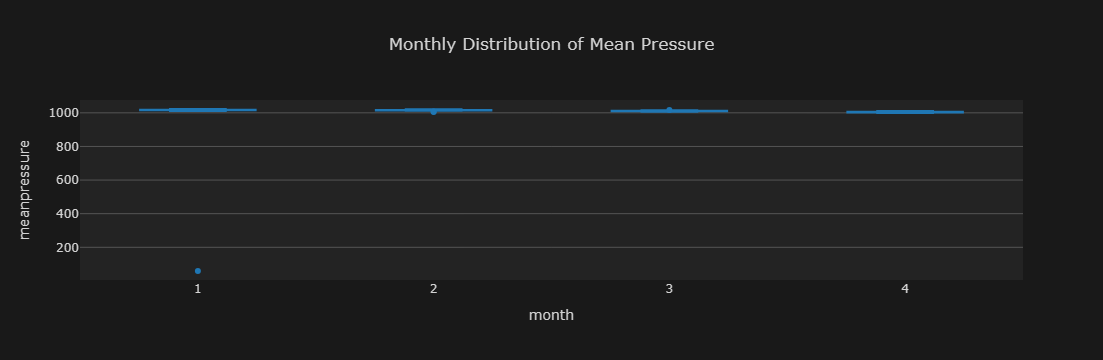

In [88]:
# Box plots by Month

fig = px.box(df, x='month', y='meantemp', title='Monthly Distribution of Mean Temperatures', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='humidity', title='Monthly Distribution of Mean Humidity', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='wind_speed', title='Monthly Distribution of Mean wind_speed', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='meanpressure', title='Monthly Distribution of Mean Pressure', template='xgridoff_dark')
fig.show()

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>4.4 Scatterplots</p></div>

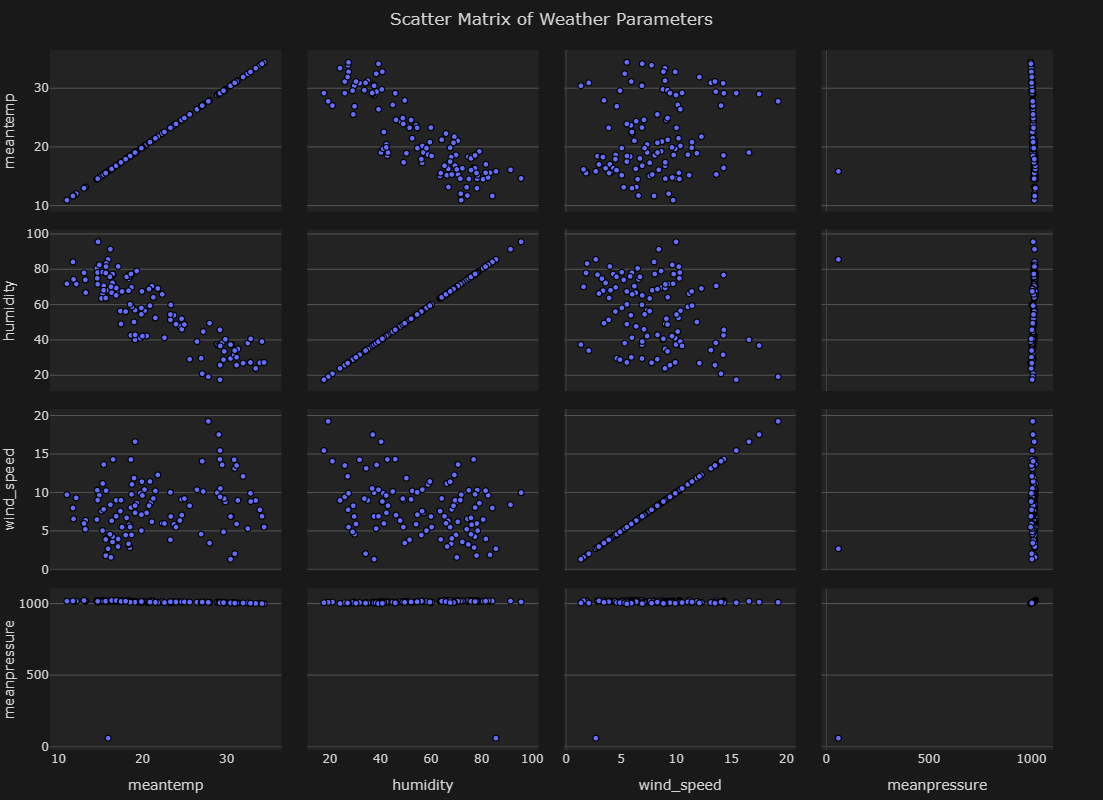

In [89]:
# Increase the size of the figure
fig = px.scatter_matrix(df, 
                        dimensions=['meantemp', 'humidity', 'wind_speed', 'meanpressure'], 
                        title='Scatter Matrix of Weather Parameters')

# Update layout to increase figure size and add outlines to dots
fig.update_layout(
    width=1200,  # Width of the figure
    height=800,  # Height of the figure
    title_x=0.5,  # Title position
    margin=dict(l=50, r=50, t=50, b=50),  # Margin around the plot
    template='xgridoff_dark'
)

# Update marker properties to add outlines
fig.update_traces(marker=dict(line=dict(width=1, color='black')))  # Add outlines to dots

# Show the figure
fig.show()

# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>4.5 Histograms 📊</p></div>

## Histogram with plotly (toggle between plots from the upper right corner):

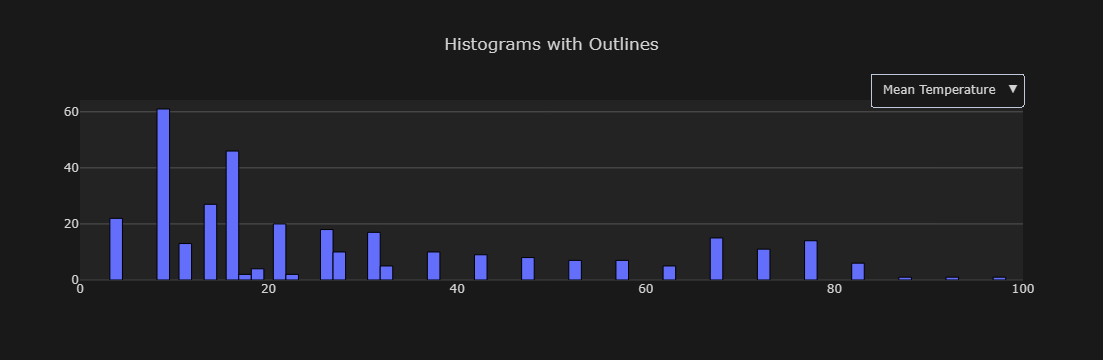

In [90]:
# Create individual histogram plots with KDE lines and outlines for each feature
fig_meantemp = px.histogram(df, x='meantemp', marginal='rug', title='Histogram Mean Temperature')
fig_humidity = px.histogram(df, x='humidity', marginal='rug', title='Histogram for Humidity')
fig_wind_speed = px.histogram(df, x='wind_speed', marginal='rug', title='Histogram for Wind Speed')

# Update traces to add outlines to the bars
for fig in [fig_meantemp, fig_humidity, fig_wind_speed]:
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))  # Add outlines to bars

# Create subplot layout
fig = go.Figure()

# Add traces to the subplot
fig.add_trace(fig_meantemp['data'][0])  # Add Mean Temperature histogram
fig.add_trace(fig_humidity['data'][0])  # Add Humidity histogram
fig.add_trace(fig_wind_speed['data'][0])  # Add Wind Speed histogram

# Define button list for toggling between plots
buttons = [
    dict(label='Mean Temperature', method='update', args=[{'visible': [True, False, False]}]),
    dict(label='Humidity', method='update', args=[{'visible': [False, True, False]}]),
    dict(label='Wind Speed', method='update', args=[{'visible': [False, False, True]}]),
]

# Add buttons to the figure
fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction='down', showactive=True, x=1.0, y=1.15)],
    title='Histograms with Outlines',
    template='xgridoff_dark'
)

# Show the figure
fig.show()

## Histograms with Seaborn:

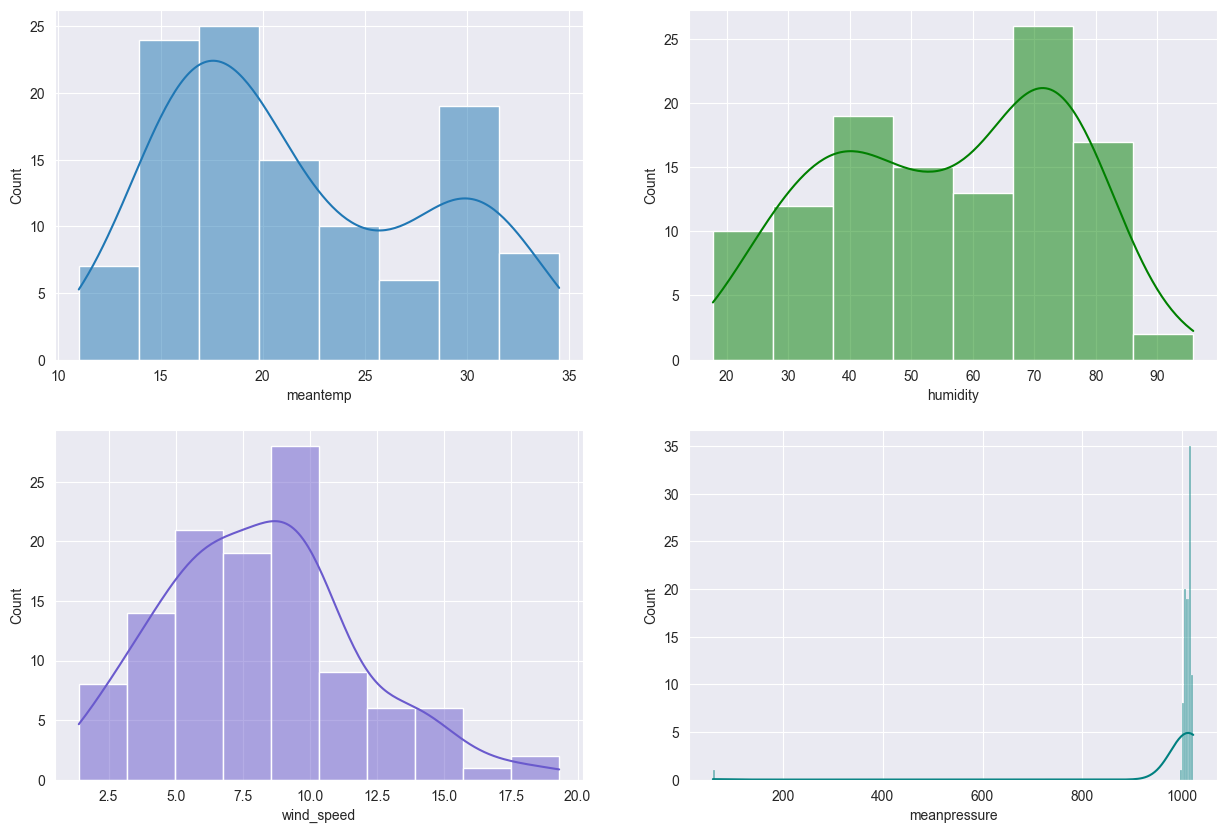

In [91]:
# Reset seaborn style to default
sns.set_style('darkgrid')

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms with KDE
sns.histplot(data=df, x="meantemp", ax=ax[0][0], kde=True)

sns.histplot(data=df, x="humidity", ax=ax[0][1], kde=True, color='green')

sns.histplot(data=df, x="wind_speed", ax=ax[1][0], kde=True, color='slateblue')

sns.histplot(data=df, x="meanpressure", ax=ax[1][1], kde=True, color='teal')

# Show the plot
plt.show()


# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 5) Feature Selection </p></div>

- After all these visualisations we can say that average pressure (meanpressure) is almost the same in every month and has almost no correlation with meantemp feature, 

I decided to continue with the 3 features for modelling: meantemp(target), humidity, wind_speed

In [92]:
df = df[['meantemp', 'humidity', 'wind_speed']]
df.head()

,meantemp,humidity,wind_speed
date,,,
2017-01-01,15.913,85.870,2.743
2017-01-02,18.500,77.222,2.894
2017-01-03,17.111,81.889,4.017
2017-01-04,18.700,70.050,4.545
2017-01-05,18.389,74.944,3.300


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meantemp    114 non-null    float64
 1   humidity    114 non-null    float64
 2   wind_speed  114 non-null    float64
dtypes: float64(3)
memory usage: 3.6 KB


In [94]:
# Creating a new Dataframe for ARIMA-SARIMA Models
df1 = df.copy()
df1

,meantemp,humidity,wind_speed
date,,,
2017-01-01,15.913,85.870,2.743
2017-01-02,18.500,77.222,2.894
2017-01-03,17.111,81.889,4.017
2017-01-04,18.700,70.050,4.545
2017-01-05,18.389,74.944,3.300
...,...,...,...
2017-04-20,34.500,27.500,5.562
2017-04-21,34.250,39.375,6.963
2017-04-22,32.900,40.900,8.890


# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 6) Data Preprocessing </p></div>

In [95]:
import gc
gc.collect()

df.head()

,meantemp,humidity,wind_speed
date,,,
2017-01-01,15.913,85.870,2.743
2017-01-02,18.500,77.222,2.894
2017-01-03,17.111,81.889,4.017
2017-01-04,18.700,70.050,4.545
2017-01-05,18.389,74.944,3.300


# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>6.1 Train Test Split </p></div>

In [96]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
dl_train, dl_test = df.iloc[:train_size], df.iloc[train_size:]
print(len(dl_train), len(dl_test))

91 23


# <div style="color:white;display:inline-block;border-radius:50px;background-color:brown;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>6.2 Scaling </p></div>

## Which models require scaling? <br>

#### 1. ARIMA and SARIMA: 
These models typically do not require scaling because they work with the raw time series data. However, if your data has a wide range of values or if you're dealing with different scales across features, scaling might help improve model performance.

#### 2. Prophet: 
Prophet does not require scaling. It is robust to outliers and can handle non-stationary data directly.

#### 3. RNN, LSTM, and GRU: 
These models often benefit from scaling, especially if you are using activation functions like sigmoid or tanh, which are sensitive to the scale of the input data. Scaling helps stabilize training by putting all features on a similar scale, which can speed up convergence and prevent exploding gradients.

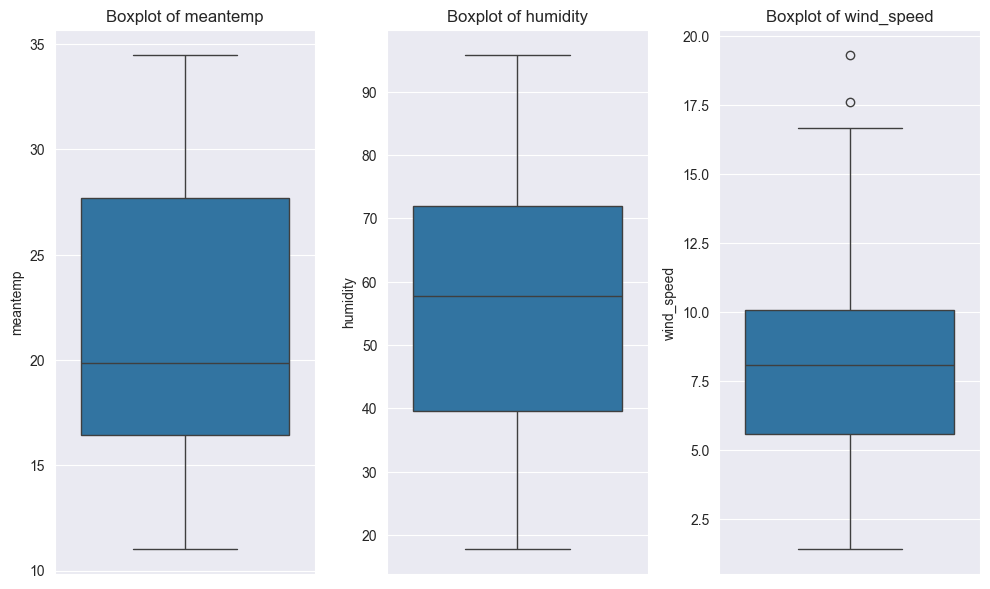

In [97]:
# find out what scaling to perform

f_columns = ['meantemp', 'humidity', 'wind_speed']
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1) 
sns.boxplot(y=df['meantemp'])
plt.title('Boxplot of meantemp')

plt.subplot(1, 3, 2) 
sns.boxplot(y=df['humidity'])
plt.title('Boxplot of humidity')

plt.subplot(1, 3, 3) 
sns.boxplot(y=df['wind_speed'])
plt.title('Boxplot of wind_speed')

plt.tight_layout() 
plt.show()

Applying: 

- MinMax scaling for meantemp and humidity
    - scaling the target meantemp separately


- Robust scaling for wind_speed

In [98]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

robust_scaler = RobustScaler()   # scaler for wind_speed
minmax_scaler = MinMaxScaler()  # scaler for humidity
target_transformer = MinMaxScaler()   # scaler for target (meantemp)

In [99]:
dl_train['wind_speed'] = robust_scaler.fit_transform(dl_train[['wind_speed']])  # robust for wind_speed
dl_train['humidity'] = minmax_scaler.fit_transform(dl_train[['humidity']]) # minmax for humidity
dl_train['meantemp'] = target_transformer.fit_transform(dl_train[['meantemp']]) # target

dl_test['wind_speed'] = robust_scaler.transform(dl_test[['wind_speed']])
dl_test['humidity'] = minmax_scaler.transform(dl_test[['humidity']])
dl_test['meantemp'] = target_transformer.transform(dl_test[['meantemp']])

In [100]:
display(df.head())
display(dl_train.head())

,meantemp,humidity,wind_speed
date,,,
2017-01-01,15.913,85.870,2.743
2017-01-02,18.500,77.222,2.894
2017-01-03,17.111,81.889,4.017
2017-01-04,18.700,70.050,4.545
2017-01-05,18.389,74.944,3.300


,meantemp,humidity,wind_speed
date,,,
2017-01-01,0.241,0.838,-1.147
2017-01-02,0.368,0.697,-1.113
2017-01-03,0.300,0.773,-0.862
2017-01-04,0.378,0.580,-0.744
2017-01-05,0.363,0.659,-1.023


This function prepares the input features and target values in the format required for training a recurrent neural network (RNN) or LSTM model for sequential prediction tasks. It creates sequences of input features and their corresponding target values, which can be fed into the model during training.

- X: This parameter represents the input features, typically a pandas DataFrame containing multiple time-series variables such as temperature, humidity, etc.
- y: This parameter represents the target values, which are typically the values we want to predict based on the input features.
- time_steps: This parameter defines the length of each sequence. It determines how many data points from the past will be used to predict the next data point. For example, if time_steps is set to 3, the function will create sequences of three consecutive data points as input features and the next data point as the target value.

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 7) SimpleRNN Model </p></div>

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

def create_dataset(X, y, time_steps=1):  
    Xs, ys = [], []   
    for i in range(len(X) - time_steps):   
        v = X.iloc[i:(i + time_steps)].values 
        Xs.append(v)      
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)  

This function prepares the input features and target values in the format required for training a recurrent neural network (RNN) or LSTM model for sequential prediction tasks. It creates sequences of input features and their corresponding target values, which can be fed into the model during training.

- X: This parameter represents the input features, typically a pandas DataFrame containing multiple time-series variables such as temperature, humidity, etc.
- y: This parameter represents the target values, which are typically the values we want to predict based on the input features.
- time_steps: This parameter defines the length of each sequence. It determines how many data points from the past will be used to predict the next data point. For example, if time_steps is set to 3, the function will create sequences of three consecutive data points as input features and the next data point as the target value.

In [102]:
# Create sequences
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [103]:
# Build the model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = rnn_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = rnn_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
88/88 [==============================] - 3s 10ms/step - loss: 0.0645 - val_loss: 0.0518
Epoch 2/30
88/88 [==============================] - 0s 5ms/step - loss: 0.0282 - val_loss: 0.0508
Epoch 3/30
88/88 [==============================] - 0s 5ms/step - loss: 0.0206 - val_loss: 0.0244
Epoch 4/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0223 - val_loss: 0.0100
Epoch 5/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0194 - val_loss: 0.0303
Epoch 6/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.0557
Epoch 7/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.0148
Epoch 8/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0317
Epoch 9/30
88/88 [==============================] - 1s 6ms/step - loss: 0.0146 - val_loss: 0.0101
Epoch 10/30
88/88 [==============================] - 1s 7ms/step - loss: 0.0152 - val_loss: 0.0266
Epoch 11/30
88/88 

In [105]:
# Make predictions
rnn_pred = rnn_model.predict(X_test)
rnn_pred = target_transformer.inverse_transform(rnn_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

1/1 [==============================] - 0s 55ms/step


In [106]:
# Calculate RMSE and R2 scores
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y_test, rnn_pred))
r2 = r2_score(y_test, rnn_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 609.5435146657571
R2 Score: -138.00020570451696


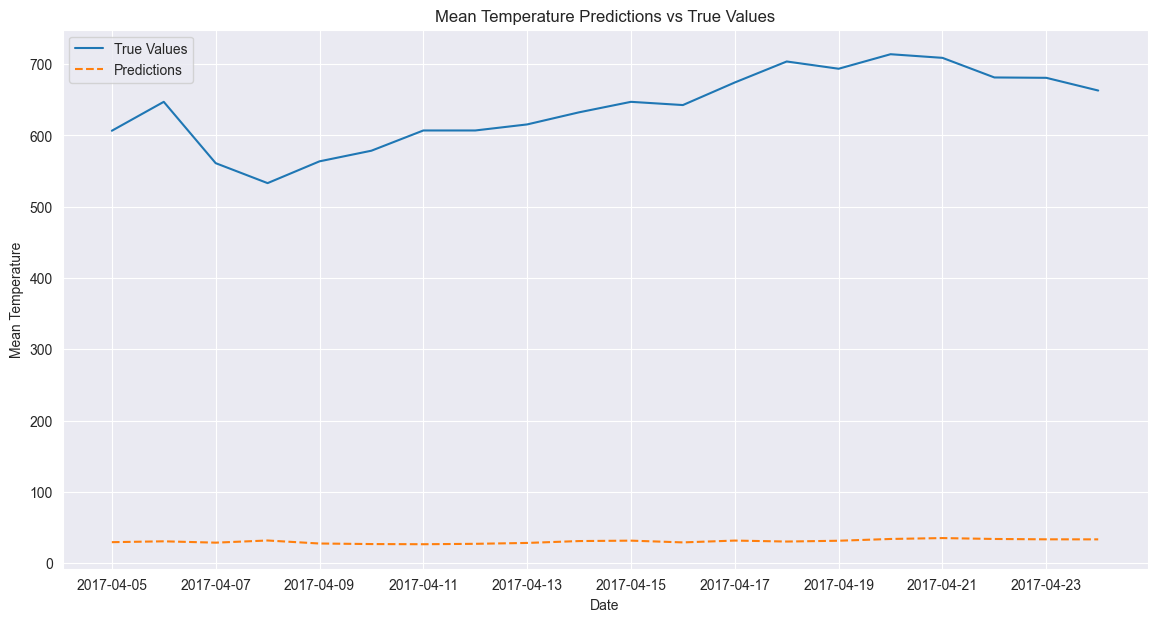

In [107]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], rnn_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

In [108]:
rnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100)               10400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10501 (41.02 KB)
Trainable params: 10501 (41.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


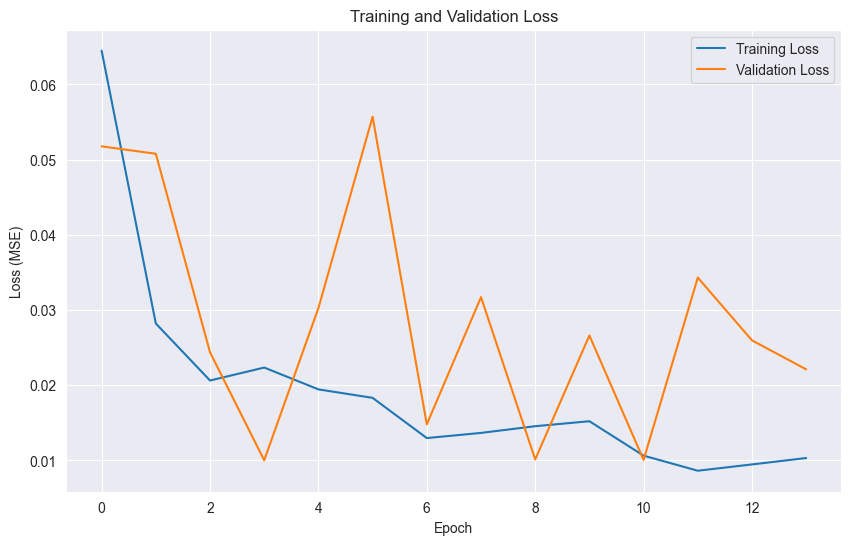

In [109]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Parameter Tuning for RNN:

    tanh -> 

length 7, 50 neurons:

- RMSE: 1.7022050638627386
- R2 Score: 0.9107810517336425


length 7, 100 neurons:

- RMSE: 1.6977972058472743
- R2 Score: 0.9112425181993008
 
length 3, 100 neurons:

- RMSE: 1.6785269886734864
- R2 Score: 0.9122955094603048

length 3, 100 neurons, patience changed from 5 to 10:  **BEST**

- RMSE: 1.6496086733687276
- R2 Score: 0.9152914913407373
    
length 30, 100 neurons:
    
- RMSE: 1.893428742100526
- R2 Score: 0.8968513361685011
    

    relu -> 

length 7, 50 neurons

- RMSE: 1.7621630164518767
- R2 Score: 0.9043851149010912

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 8) LSTM Model</p></div>

In [110]:
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [52]:
from tensorflow.keras.layers import LSTM

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = lstm_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
88/88 [==============================] - 3s 8ms/step - loss: 0.0496 - val_loss: 0.0660
Epoch 2/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 0.0217
Epoch 3/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0172
Epoch 4/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 5/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0167
Epoch 6/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0088
Epoch 7/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0128
Epoch 8/30
88/88 [==============================] - 0s 6ms/step - loss: 0.0102 - val_loss: 0.0155
Epoch 9/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.0144
Epoch 10/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 11/30
88/88 [

In [53]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               41600     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 41701 (162.89 KB)
Trainable params: 41701 (162.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Make predictions
lstm_pred = lstm_model.predict(X_test)
lstm_pred = target_transformer.inverse_transform(lstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

1/1 [==============================] - 0s 397ms/step


RMSE: 1.8939926493061878
R2 Score: 0.44286835591301865


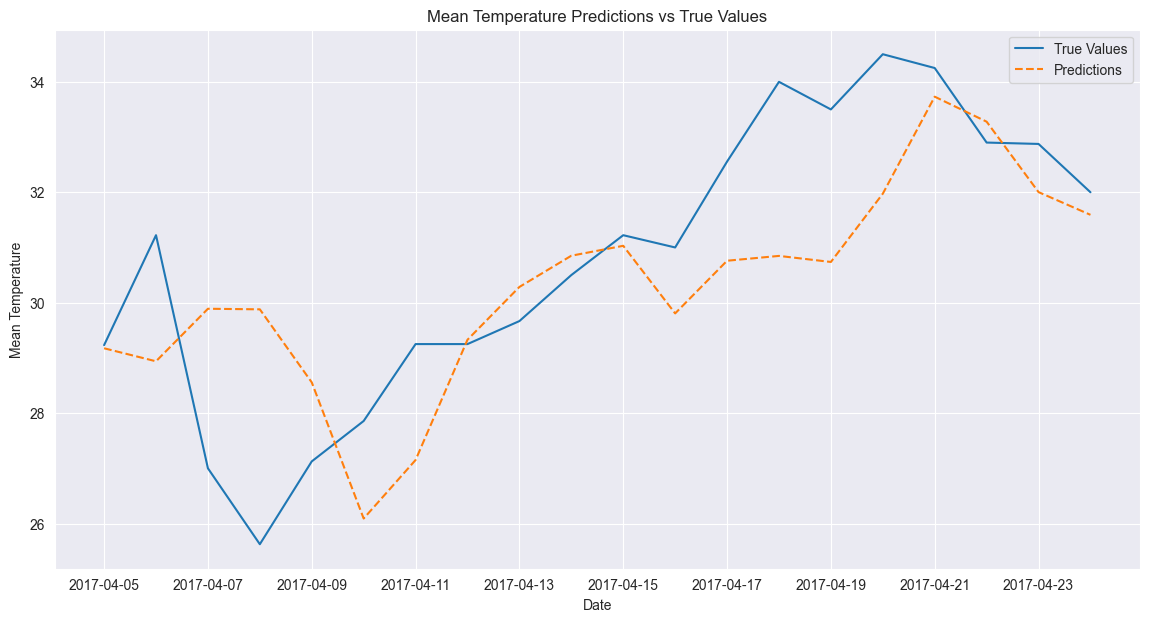

In [55]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
r2 = r2_score(y_test, lstm_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], lstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

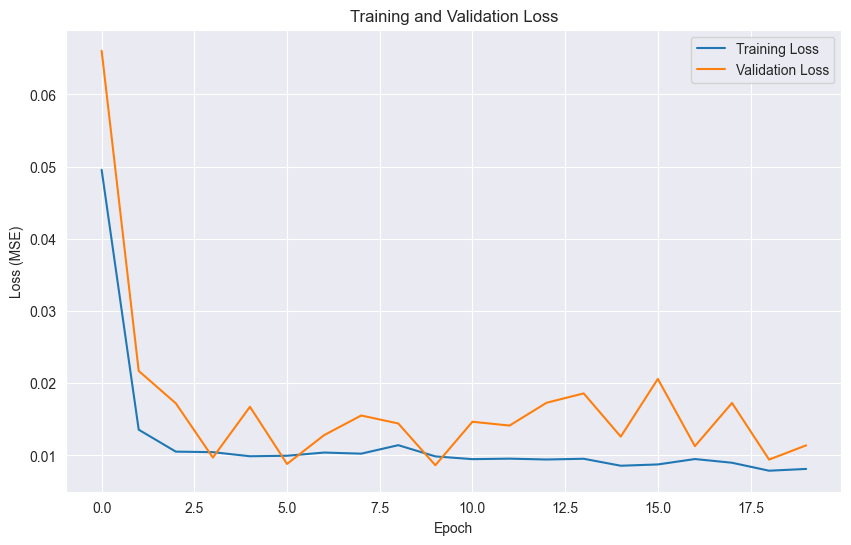

In [56]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

I also tried using TimeseriesGenerator() instead of the def function, and the results were:

![image.png](attachment:1c08d804-4e94-48ad-9600-ccac2e085e1a.png)

## Bidirectional LSTM

Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem.

In [57]:
# Create sequences
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [58]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Build the bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2]))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
88/88 [==============================] - 4s 11ms/step - loss: 0.0431 - val_loss: 0.0220
Epoch 2/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 3/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0063
Epoch 4/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0199
Epoch 5/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.0091
Epoch 6/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0259
Epoch 7/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0230
Epoch 8/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.0123
Epoch 9/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.0098
Epoch 10/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.0101
Epoch 11/30
88/88 

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 200)               83200     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 83401 (325.79 KB)
Trainable params: 83401 (325.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# Make predictions
bilstm_pred = model.predict(X_test)
bilstm_pred = target_transformer.inverse_transform(bilstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

1/1 [==============================] - 1s 725ms/step


RMSE: 1.6150011966258566
R2 Score: 0.5949142696135525


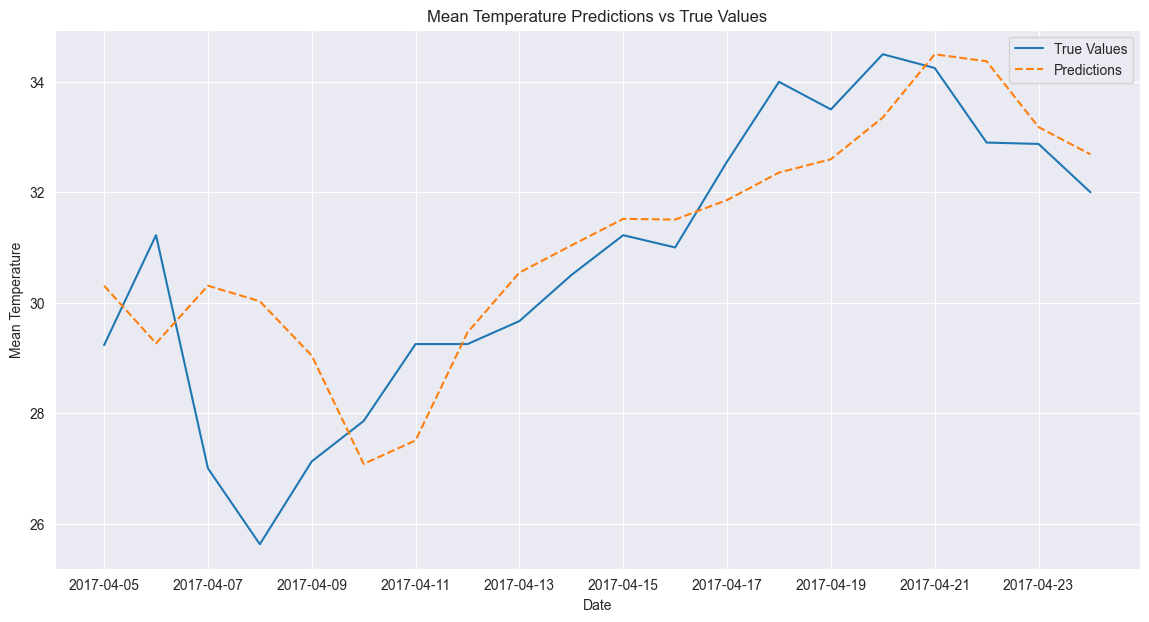

In [61]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, bilstm_pred))
r2 = r2_score(y_test, bilstm_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], bilstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

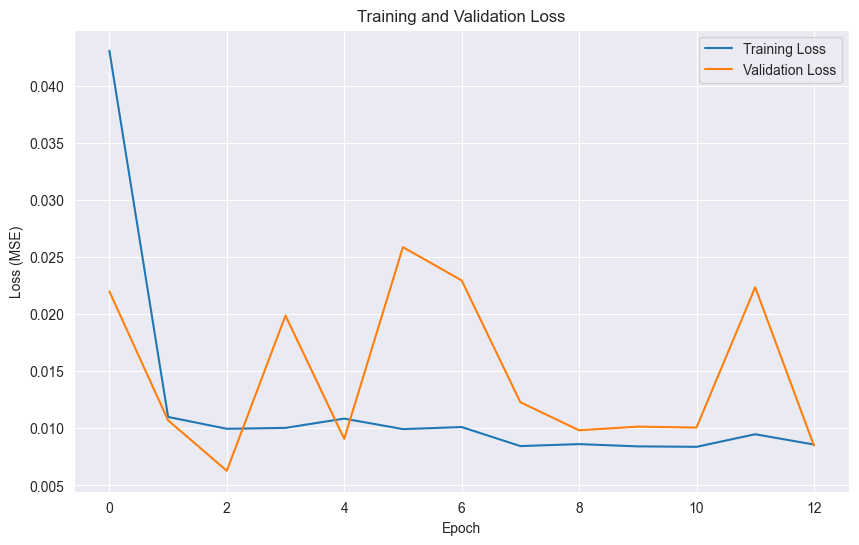

In [62]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 9) GRU Model</p></div>

In [63]:
# Create sequences
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
def create_dataset(data, target, sequence_length):  
    X, y = [], []  
    for i in range(len(data) - sequence_length):  
        X.append(data[i:(i + sequence_length)].values)  
        y.append(target[i + sequence_length])  
    return np.array(X), np.array(y)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [64]:
from tensorflow.keras.layers import GRU

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = gru_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = gru_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
88/88 [==============================] - 3s 9ms/step - loss: 0.0397 - val_loss: 0.0344
Epoch 2/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.0109
Epoch 3/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0186
Epoch 4/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0174
Epoch 5/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0064
Epoch 6/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.0159
Epoch 7/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.0077
Epoch 8/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0078
Epoch 9/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.0099
Epoch 10/30
88/88 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0239
Epoch 11/30
88/88 [

In [65]:
gru_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               31500     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 31601 (123.44 KB)
Trainable params: 31601 (123.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
# Make predictions
gru_pred = gru_model.predict(X_test)
gru_pred = target_transformer.inverse_transform(gru_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

1/1 [==============================] - 0s 353ms/step


RMSE: 1.6350230718899947
R2 Score: 0.5848079598986227


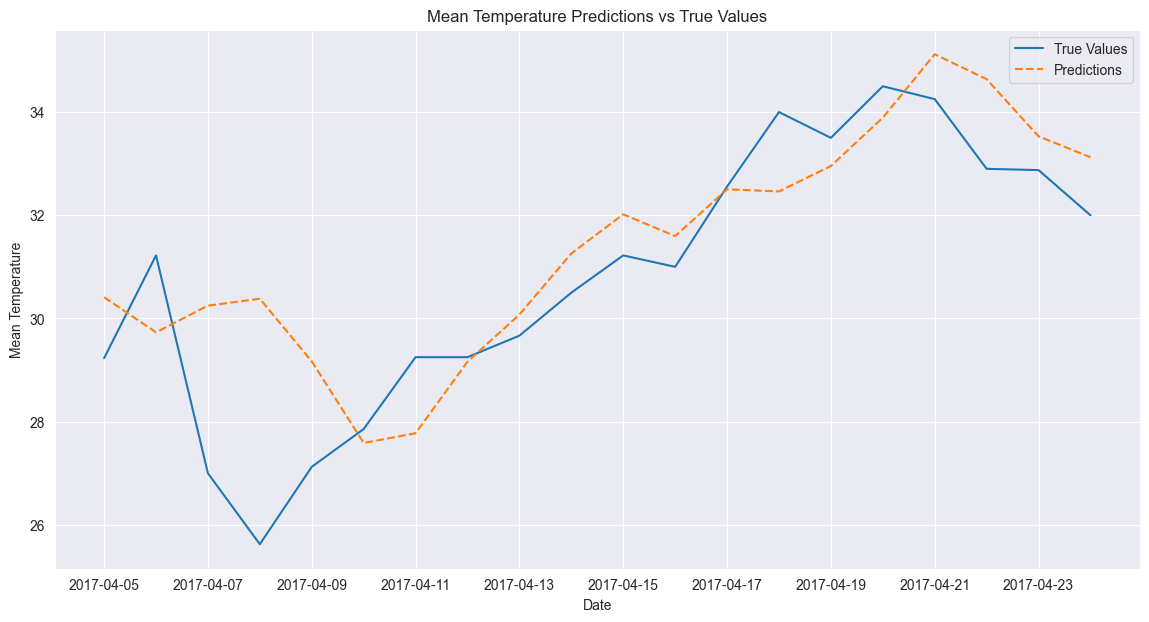

In [67]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, gru_pred))
r2 = r2_score(y_test, gru_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], gru_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

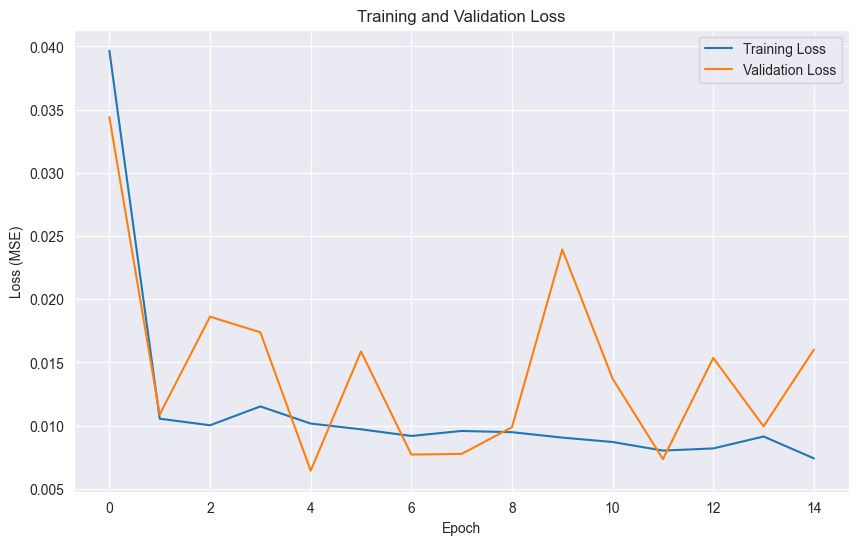

In [68]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 10) review GRU </p></div>

# Structure of GRU Model  

The Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) architecture that is particularly effective for sequence modeling tasks. It was introduced to address some of the limitations of traditional RNNs, such as difficulties in capturing long-range dependencies due to the vanishing gradient problem. Here’s an overview of the structure of the GRU model:  

## Structure of GRU Model  

The GRU model consists primarily of two types of gates: **reset gate** and **update gate**, along with hidden states. Below are the key components of a GRU cell:  

1. **Hidden State (h)**:   
   - The hidden state is the representation of the output of the GRU at a given time step. It holds information from previous time steps in the sequence.  

2. **Reset Gate (r)**:  
   - The reset gate controls how much of the past information to forget. It takes the current input \( x_t \) and the previous hidden state \( h_{t-1} \) to compute which information to discard.  
   - **Formula**:  
     \[  
     r_t = \sigma(W_r \cdot [h_{t-1}, x_t])  
     \]  
   - Here, \( W_r \) is the weight matrix for the reset gate, and \( \sigma \) is the sigmoid activation function.  

3. **Update Gate (z)**:  
   - The update gate determines how much of the past information needs to be passed along to the future. It also considers both the current input and the previous hidden state.  
   - **Formula**:  
     \[  
     z_t = \sigma(W_z \cdot [h_{t-1}, x_t])  
     \]  

4. **Candidate Hidden State (\( \tilde{h} \))**:  
   - This represents the new hidden state, computed based on the current input and the reset gate's influence on the previous hidden state.  
   - **Formula**:  
     \[  
     \tilde{h}_t = \tanh(W_h \cdot [r_t \odot h_{t-1}, x_t])  
     \]  
   - Here, \( W_h \) is the weight matrix for the candidate hidden state, \( \odot \) denotes element-wise multiplication, and \( \tanh \) is the hyperbolic tangent activation function.  

5. **Final Hidden State (h)**:  
   - The final hidden state is computed using the update gate and the candidate hidden state:  
   - **Formula**:  
     \[  
     h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t  
     \]  
   - This equation shows how much of the previous hidden state and the candidate hidden state contributes to the new hidden state.  

## Summary of GRU Operations  

1. **Input Processing**:  
   - At each time step \( t \), the GRU takes the input \( x_t \) and the previous hidden state \( h_{t-1} \) to compute the reset gate, update gate, and the candidate hidden state.  

2. **State Update**:  
   - The hidden state is updated based on the computed gates, allowing the model to carry forward relevant information while forgetting the less important parts of the past.  

## Advantages of GRU  

- **Simplified Structure**: GRUs are often simpler than LSTMs, as they have fewer gates (only two), making them computationally more efficient.  
- **Performance**: GRUs can perform comparably to LSTMs in many tasks and can be 
# Disadvantages of GRU Model  

While GRUs have several advantages, they also come with certain disadvantages:  

1. **Limited Expressiveness**:  
   - Compared to more complex models like Long Short-Term Memory (LSTM) networks, GRUs may have limited capacity to model long sequences and complex patterns. Their simpler structure can restrict their performance on tasks with very intricate dependencies.  

2. **Training Instability**:  
   - GRUs, like all RNNs, can suffer from difficulties during training, such as exploding or vanishing gradients, particularly for very long sequences. While they are generally better than vanilla RNNs, LSTMs may perform better in some cases.  

3. **Hyperparameter Sensitivity**:  
   - The performance of GRUs can be sensitive to hyperparameter settings, such as the learning rate, batch size, and number of layers. Finding the right configuration often requires careful tuning.  

4. **Data Requirements**:  
   - GRUs typically require large amounts of data to perform effectively, especially for complex tasks. In scenarios with limited data, they may not provide significant performance improvements over simpler models.  

5. **Limited Memory Capacity**:  
   - GRUs maintain a hidden state but may not track longer-term dependencies as well as LSTMs, which have more sophisticated mechanisms for handling memory. This can make them less effective for certain tasks that require capturing information over extended sequences.  

6. **Lack of Interpretability**:  
   - Like many deep learning models, GRUs are often viewed as "black boxes," making it difficult to interpret the learned representations and understand why certain predictions are made.  

7. **Computational Overhead**:  
   - Although GRUs are more efficient than LSTMs, they still come with a higher computational cost compared to simpler models like feedforward networks or basic RNNs, which may be more appropriate for simpler tasks.  

## Conclusion  

While GRUs are powerful tools for sequence modeling, it’s essential to weigh these disadvantages against their benefits based on the specific application and context in which they are used.faster to train while often requiring less memory.  

## Use Cases  

GRUs are widely used for various tasks involving sequential data, such as:  
- Natural Language Processing (NLP) for tasks like text generation, sentiment analysis, and machine translation.  
- Time-series prediction, such as stock price prediction and weather forecasting.  
- Speech recognition and audio analysis.

# <div style="color:white;border-radius:80px;background-color:chocolate;font-family:Nexa;overflow:hidden"><p style="padding:5px;color:white;text-align:center;overflow:hidden;font-size:130%;letter-spacing:0.5px;margin:0"><b> </b> 11) Conclusion </p></div>

# Comparison of LSTM, GRU, and RNN  

Recurrent Neural Networks (RNNs) are designed to work with sequential data, but they struggle with long-range dependencies. LSTMs and GRUs improve upon basic RNNs by incorporating gating mechanisms. Below is a detailed comparison of these three architectures.  

## 1. Basic Structure  

- **RNN**:  
  - Traditional RNNs consist of a simple loop that connects the output from the previous time step back into the current time step.  
  - **Pros**: Simple architecture; easy to implement.  
  - **Cons**: Prone to vanishing and exploding gradient problems, making it hard to capture long-term dependencies.  

- **LSTM**:  
  - LSTMs introduce three gates: input gate, forget gate, and output gate. These gates control the flow of information into and out of the cell state, allowing it to preserve long-term dependencies effectively.  
  - **Structure**:  
    - **Input Gate**: Decides how much of the new information to add.  
    - **Forget Gate**: Decides how much of the previous information to forget.  
    - **Output Gate**: Decides what the next hidden state should be.  
  - **Pros**: Excellent at capturing long-term dependencies; flexible and can model complex patterns.  
  - **Cons**: More complex than RNNs; computationally expensive.  

- **GRU**:  
  - GRUs simplify LSTMs by combining the input and forget gates into a single update gate. It also has a reset gate that influences the new memory content.  
  - **Structure**:  
    - **Reset Gate (r)**: Determines how much of past information to forget.  
    - **Update Gate (z)**: Combines the role of the forget and input gates.  
  - **Pros**: More straightforward architecture than LSTM; often trains faster and requires less memory.  
  - **Cons**: May not handle long sequences as effectively as LSTMs in some cases.  

## 2. Memory Management  

- **RNN**:  
  - Maintains only the hidden state. Suffers from limited memory capacity, leading to difficulties in retaining information over long sequences.  

- **LSTM**:  
  - Uses a separate cell state in addition to the hidden state. This allows it to maintain and carry forward information for extended periods more effectively.  

- **GRU**:  
  - Lacks a separate cell state; instead, it uses hidden states modulated by its reset and update gates to manage memory. While less flexible than LSTM in some scenarios, it can still retain necessary information effectively.  

## 3. Performance  

- **RNN**:  
  - Often performs poorly on tasks requiring long-term context due to the vanishing gradient problem. Suitable for shorter sequences or simpler tasks.  

- **LSTM**:  
  - Typically outperforms RNNs on complex tasks and longer sequences (e.g., language modeling and translation) due to its sophisticated memory management.  

- **GRU**:  
  - Usually comparable to LSTMs on many tasks. They can perform as well as LSTMs with less complexity, making them a preferred choice in scenarios where computational efficiency is essential.  

## 4. Training and Complexity  

- **RNN**:  
  - Easier to implement and train due to its simpler architecture.  
  
- **LSTM**:  
  - Requires careful tuning of parameters and is more computationally intensive due to the additional gates and cell states.  

- **GRU**:  
  - Generally simpler to implement and faster to train than LSTMs, while still providing competitive performance.  

## Conclusion  

we see that GRU and LSTM has a same performance and in this case they work better